# Inteligencia Artificial

## Bibliotecas

In [29]:
!pip install prophet

In [30]:
import yfinance as yf

## Coleta de Dados

In [31]:
dados = yf.Ticker("PETR4.SA").history("2y")


In [32]:
dados.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-01 00:00:00-03:00,16.219178,16.335203,15.909782,15.958124,72545400,0.0,0.0
2022-04-04 00:00:00-03:00,15.904949,15.904949,15.590717,15.808262,56053000,0.0,0.0
2022-04-05 00:00:00-03:00,15.788924,15.982298,15.658397,15.658397,45847200,0.0,0.0
2022-04-06 00:00:00-03:00,15.759916,15.846934,15.489195,15.643893,56947100,0.0,0.0
2022-04-07 00:00:00-03:00,15.779257,16.465733,15.711577,16.456064,118469400,0.0,0.0


# Teatamento de Dados

In [33]:
treinamento = dados.reset_index()
treinamento["Date"] = treinamento["Date"].dt.date
treinamento = treinamento[["Date","Close"]]
treinamento.columns = ["ds","y"]
treinamento

,ds,y
0,2022-04-01,15.958124
1,2022-04-04,15.808262
2,2022-04-05,15.658397
3,2022-04-06,15.643893
4,2022-04-07,16.456064
...,...,...
492,2024-03-22,36.049999
493,2024-03-25,36.599998
494,2024-03-26,36.259998
495,2024-03-27,36.549999


## Criação do modelo de Machine Learning (Aprendizado de Máquina)

In [34]:
from prophet import Prophet

In [35]:
modelo = Prophet()

### Treinando um modelo de ML

In [36]:
modelo.fit(treinamento)

10:01:07 - cmdstanpy - INFO - Chain [1] start processing
10:01:07 - cmdstanpy - INFO - Chain [1] done processing


## Grando datas Futuras

In [37]:
datas_futuras = modelo.make_future_dataframe(30)
datas_futuras

,ds
0,2022-04-01
1,2022-04-04
2,2022-04-05
3,2022-04-06
4,2022-04-07
...,...
522,2024-04-23
523,2024-04-24
524,2024-04-25
525,2024-04-26


## Gerando as previsões

In [38]:
previsoes = modelo.predict(datas_futuras)
previsoes.head(-5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-01,15.447390,13.418885,17.525288,15.447390,15.447390,-0.025121,-0.025121,-0.025121,-0.025121,-0.025121,-0.025121,0.0,0.0,0.0,15.422269
1,2022-04-04,15.558274,13.304631,17.522811,15.558274,15.558274,-0.121150,-0.121150,-0.121150,-0.121150,-0.121150,-0.121150,0.0,0.0,0.0,15.437125
2,2022-04-05,15.595236,13.317876,17.592758,15.595236,15.595236,-0.138524,-0.138524,-0.138524,-0.138524,-0.138524,-0.138524,0.0,0.0,0.0,15.456712
3,2022-04-06,15.632197,13.565205,17.583694,15.632197,15.632197,-0.102704,-0.102704,-0.102704,-0.102704,-0.102704,-0.102704,0.0,0.0,0.0,15.529493
4,2022-04-07,15.669159,13.671166,17.723120,15.669159,15.669159,-0.067371,-0.067371,-0.067371,-0.067371,-0.067371,-0.067371,0.0,0.0,0.0,15.601788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2024-04-18,41.497201,39.266732,43.471724,41.383415,41.585906,-0.067371,-0.067371,-0.067371,-0.067371,-0.067371,-0.067371,0.0,0.0,0.0,41.429829
518,2024-04-19,41.537321,39.429361,43.607779,41.409138,41.632759,-0.025121,-0.025121,-0.025121,-0.025121,-0.025121,-0.025121,0.0,0.0,0.0,41.512200
519,2024-04-20,41.577442,39.647926,43.958821,41.439660,41.679469,0.227435,0.227435,0.227435,0.227435,0.227435,0.227435,0.0,0.0,0.0,41.804877
520,2024-04-21,41.617562,39.843851,43.875600,41.470353,41.729738,0.227435,0.227435,0.227435,0.227435,0.227435,0.227435,0.0,0.0,0.0,41.844997


## Visializando as previsões

In [39]:
from prophet.plot import plot_plotly

C:\Users\Vinicius\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



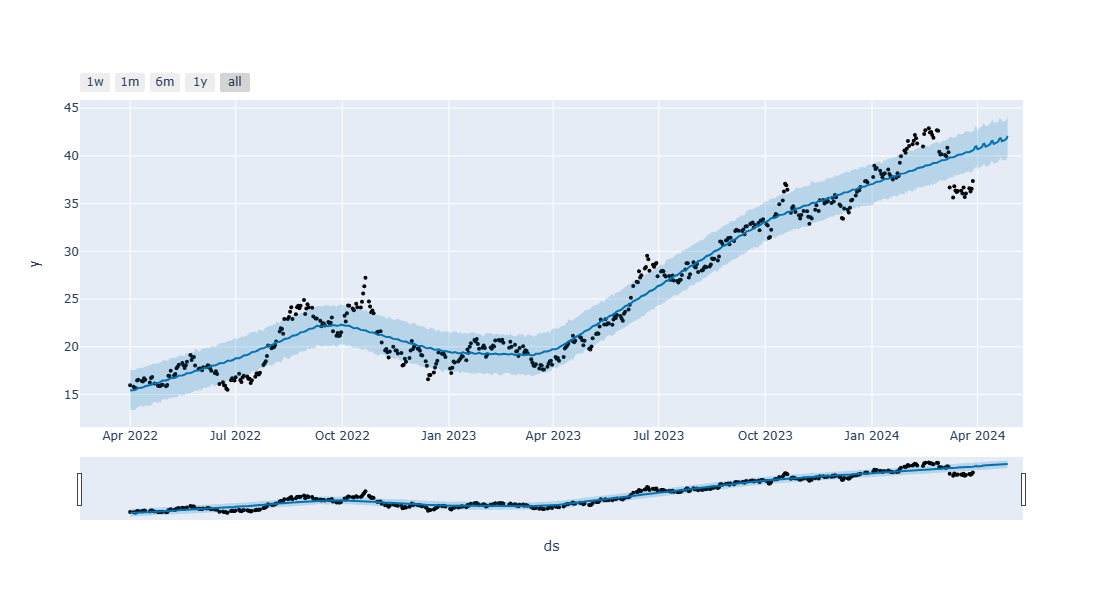

In [40]:
plot_plotly(modelo,previsoes)